# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from citipy import citipy
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'config'

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


604

In [39]:
url="http://api.openweathermap.org/data/2.5/weather?"

query_url=f"{url}appid={api_key}&q="
#response=requests.get(query_url+city+"&units=imperial").json()
response

{'coord': {'lon': 22.35, 'lat': 70.24},
 'weather': [{'id': 521,
   'main': 'Rain',
   'description': 'shower rain',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 27.23,
  'feels_like': 12.2,
  'temp_min': 24.8,
  'temp_max': 28.4,
  'pressure': 1010,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 17.22, 'deg': 340},
 'clouds': {'all': 75},
 'dt': 1579717221,
 'sys': {'type': 1,
  'id': 1634,
  'country': 'NO',
  'sunrise': 1579685672,
  'sunset': 1579693746},
 'timezone': 3600,
 'id': 778362,
 'name': 'Oksfjord',
 'cod': 200}

In [43]:
temp=[]
lat=[]
lon=[]
hum=[]
cloud=[]
wind=[]
max_temp=[]
print(f"Begining Data retrieval")
for city in cities:
    response_r=requests.get(query_url+city+"&units=imperial")
    response=response_r.json()
    try:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        print(f"Procesing record {len(temp)}:{city}")
    except:
        print('Nothing')
        pass
    


Begining Data retrieval
Procesing record 1:luanda
Procesing record 2:leiyang
Procesing record 3:yellowknife
Procesing record 4:hermanus
Procesing record 5:kharan
Procesing record 6:quimper
Procesing record 7:rikitea
Procesing record 8:constitucion
Procesing record 9:ushuaia
Procesing record 10:bonavista
Procesing record 11:darhan
Procesing record 12:san patricio
Procesing record 13:busselton
Procesing record 14:saint-philippe
Procesing record 15:barrow
Procesing record 16:atuona
Procesing record 17:port alfred
Procesing record 18:cape town
Nothing
Procesing record 19:norman wells
Procesing record 20:mpika
Procesing record 21:erzin
Procesing record 22:jamestown
Procesing record 23:ranong
Procesing record 24:bikaner
Procesing record 25:nuuk
Procesing record 26:nikolskoye
Procesing record 27:pontianak
Procesing record 28:ostrovnoy
Procesing record 29:faanui
Procesing record 30:punta cardon
Nothing
Nothing
Procesing record 31:tiksi
Procesing record 32:tasiilaq
Procesing record 33:qaanaaq
P

Procesing record 270:rapid valley
Procesing record 271:hualmay
Procesing record 272:avera
Procesing record 273:labuhan
Procesing record 274:fereydun kenar
Procesing record 275:fortuna
Procesing record 276:beloha
Procesing record 277:havelock
Procesing record 278:rivera
Procesing record 279:sao jose da coroa grande
Nothing
Procesing record 280:rietavas
Procesing record 281:namie
Procesing record 282:slidell
Procesing record 283:alofi
Procesing record 284:sao miguel do araguaia
Procesing record 285:belmopan
Procesing record 286:veraval
Procesing record 287:khorramshahr
Procesing record 288:chuy
Procesing record 289:kisangani
Procesing record 290:cap malheureux
Procesing record 291:vao
Procesing record 292:tura
Nothing
Procesing record 293:mtwara
Procesing record 294:bathsheba
Procesing record 295:apatin
Procesing record 296:andenes
Procesing record 297:bantry
Procesing record 298:zempoala
Procesing record 299:vallenar
Nothing
Procesing record 300:gizo
Procesing record 301:paamiut
Procesi

Procesing record 534:caba
Procesing record 535:chicama
Procesing record 536:hit
Procesing record 537:saint-georges
Procesing record 538:alice springs
Procesing record 539:isangel
Procesing record 540:gasa
Procesing record 541:kingman
Procesing record 542:liberal
Procesing record 543:irbil
Procesing record 544:mareeba
Procesing record 545:superior
Nothing
Procesing record 546:revelstoke
Procesing record 547:kalmar
Procesing record 548:praia
Procesing record 549:elizabeth city
Nothing
Procesing record 550:chingirlau
Procesing record 551:wenling
Nothing
Procesing record 552:oksfjord


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
city_dict={"City":cities,
         "Latitude":lat,
         "Longtitude":lon,
         "Temp":temp,
         "Max Temp":max_temp,
         "Cloudiness":cloud,
         "Humidity":hum,
         "Wind":wind }
            
        
city_temp=pd.concat([pd.Series(v,name=k) for k,v in city_dict.items()],axis=1)
city_temp=city_temp.dropna()
city_temp

,City,Latitude,Longtitude,Temp,Max Temp,Cloudiness,Humidity,Wind
0,luanda,-8.84,13.23,84.20,84.20,75.0,74.0,13.87
1,leiyang,26.40,112.86,49.14,49.14,95.0,90.0,3.76
2,yellowknife,62.46,-114.35,-2.74,-2.20,75.0,77.0,16.11
3,hermanus,-34.42,19.23,67.80,70.00,49.0,80.0,5.99
4,kharan,28.58,65.42,54.64,54.64,0.0,47.0,8.43
...,...,...,...,...,...,...,...,...
547,elin pelin,14.92,-23.51,77.00,77.00,100.0,47.0,13.87
548,conde,36.29,-76.25,42.04,46.40,1.0,52.0,8.05
549,laibin,51.09,54.08,31.12,31.12,100.0,92.0,15.17
550,miyata,28.37,121.36,57.00,57.00,95.0,90.0,7.85


In [45]:
city_temp.to_csv('cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature Plot')

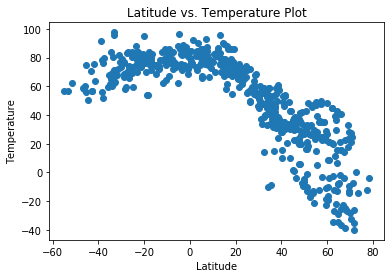

In [46]:
plt.scatter(lat,temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature Plot')

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity Plot')

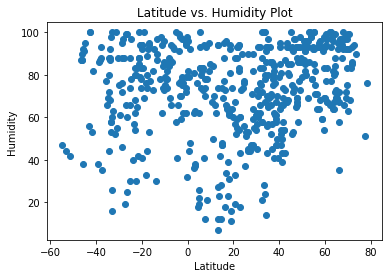

In [47]:
plt.scatter(lat,hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness Plot')

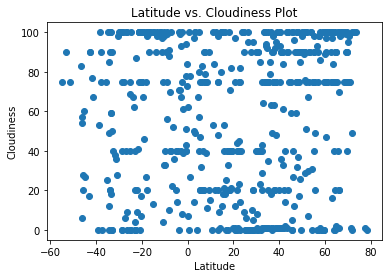

In [48]:
plt.scatter(lat,cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness Plot')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

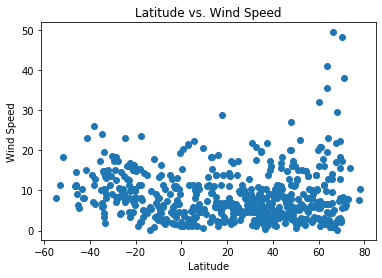

In [49]:
plt.scatter(lat,wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

## Linear Regression

In [50]:
# OPTIONAL: Create a function to create Linear Regression plots


In [51]:
# Create Northern and Southern Hemisphere DataFrames
city_north=city_temp[city_temp['Latitude']>=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: -0.8566525121737951


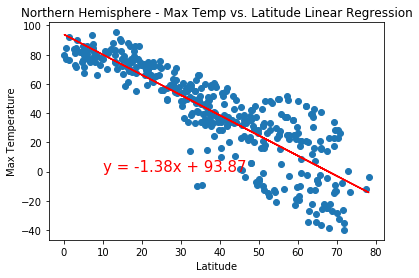

In [52]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.49136119302652354


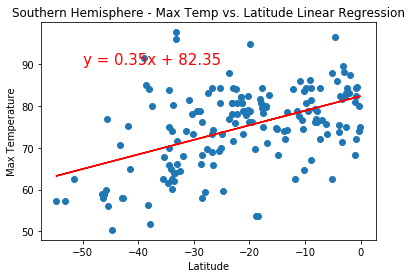

In [53]:
city_south=city_temp[city_temp['Latitude']<0]
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.41041259232510696


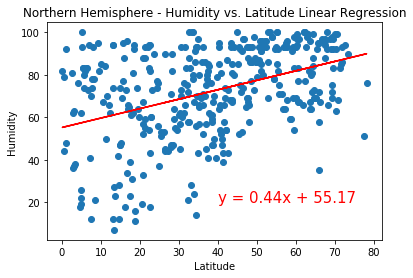

In [54]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.1632294153380404


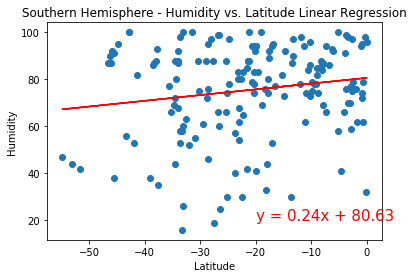

In [55]:
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.22630260349539583


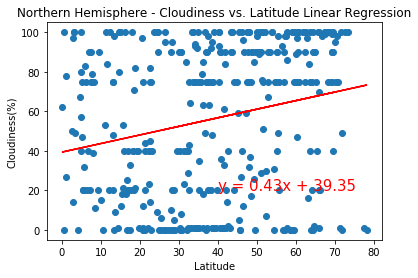

In [56]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.09845443228391156


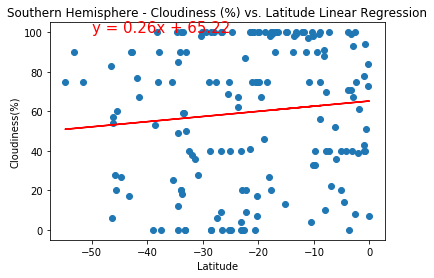

In [57]:
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.1459726195338753


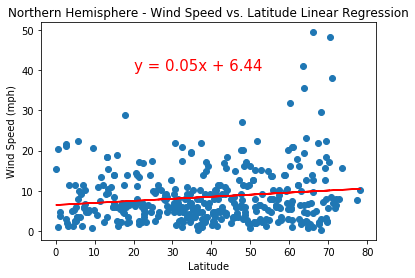

In [58]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Wind'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: -0.36161643071447447


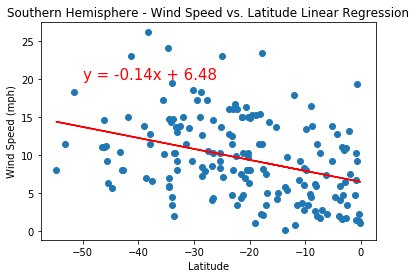

In [59]:
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Wind'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()